Now I'm trying to play with pokemon dataset, and see what I can do with it..

In [276]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


In [277]:
df = pd.read_csv("/kaggle/input/pokemon/Pokemon.csv")

In [278]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [280]:
numerical = df.iloc[:,4:11]
numerical

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


let's inspect the data first, Let's see the distribution

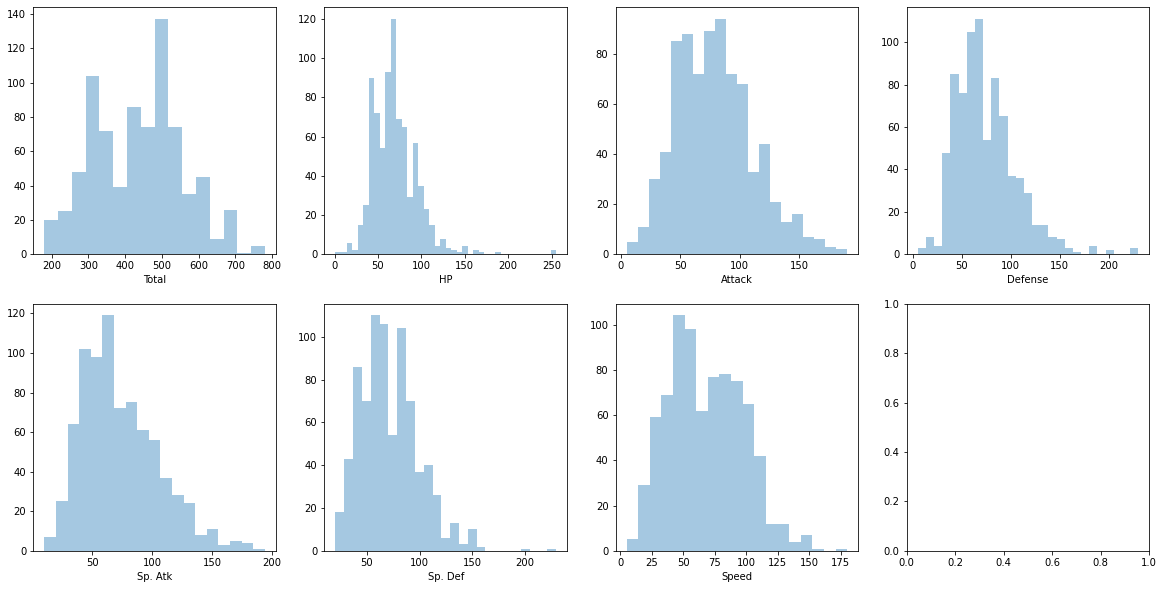

In [281]:
numerical = df.iloc[:,4:11]
fig, axes = plt.subplots(2,4, figsize=(20,10))
a = 0
b = 0
for col in numerical.columns:
    sns.distplot(numerical[col], ax = axes[a][b], kde=False )
    b+=1
    if b == 4:
        b = 0
        a += 1

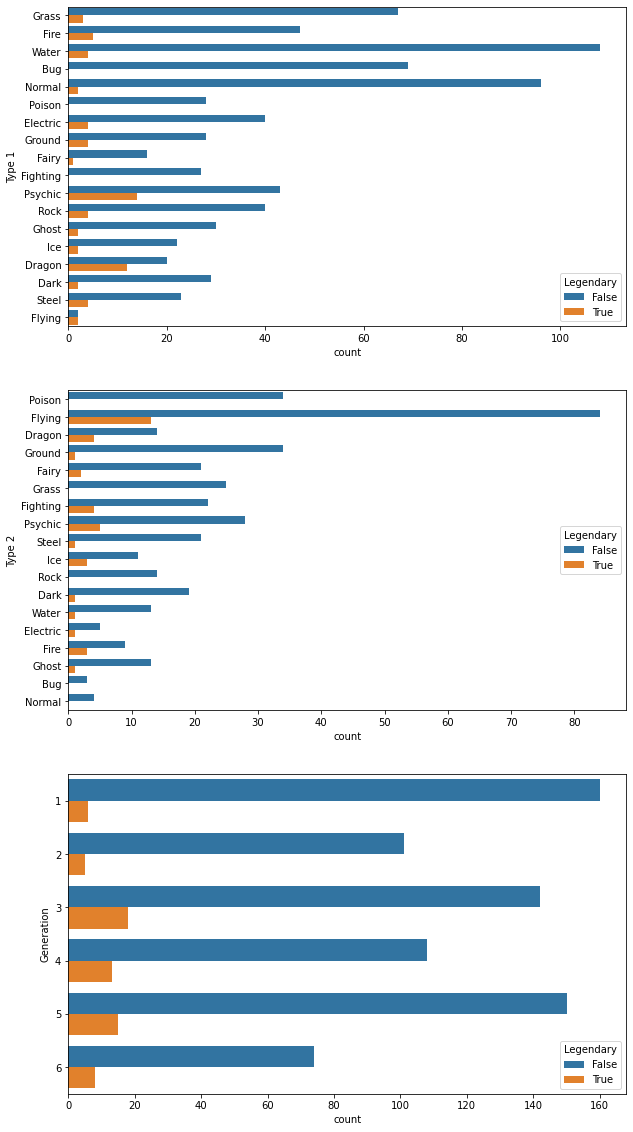

In [282]:
categorical = df[["Type 1", "Type 2", "Generation", "Legendary"]]


fig, axes = plt.subplots(3, figsize=(10,20))
# a = 0
b = 0
for col in categorical.columns:
    if col == "Legendary":
        break
    sns.countplot(y = categorical[col], hue= "Legendary", data = df, ax = axes[b])
#     axes[a][b].set_xticklabels(axes[a][b].get_xticklabels(), rotation=90)
    b+=1
# ax = sns.countplot(df["Type 1"])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

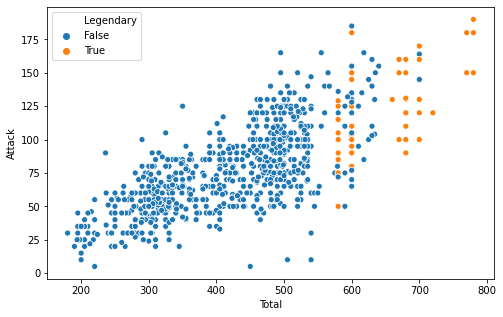

In [283]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total", y="Attack", hue="Legendary", data=df)

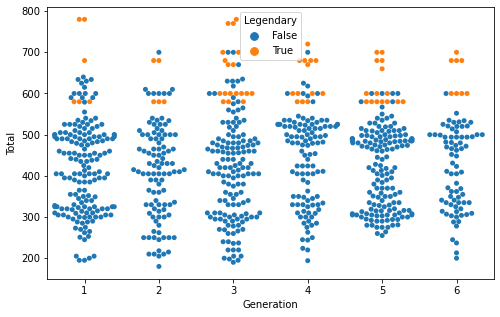

In [284]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="Generation", y="Total", hue="Legendary", data=df)

Now, I'll see the correlation between features

In [285]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Encoding String Categorical Data

In [286]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df["Type 1"] = le.fit_transform(df["Type 1"])
df["Type 2"] = df["Type 2"].fillna("Null")
df["Type 2"] = le.fit_transform(df["Type 2"])
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,14,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,9,14,405,60,62,63,80,80,60,1,False
2,3,Venusaur,9,14,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,9,14,625,80,100,123,122,120,80,1,False
4,4,Charmander,6,13,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,15,4,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,15,4,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,14,8,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,14,1,680,80,160,60,170,130,80,6,True


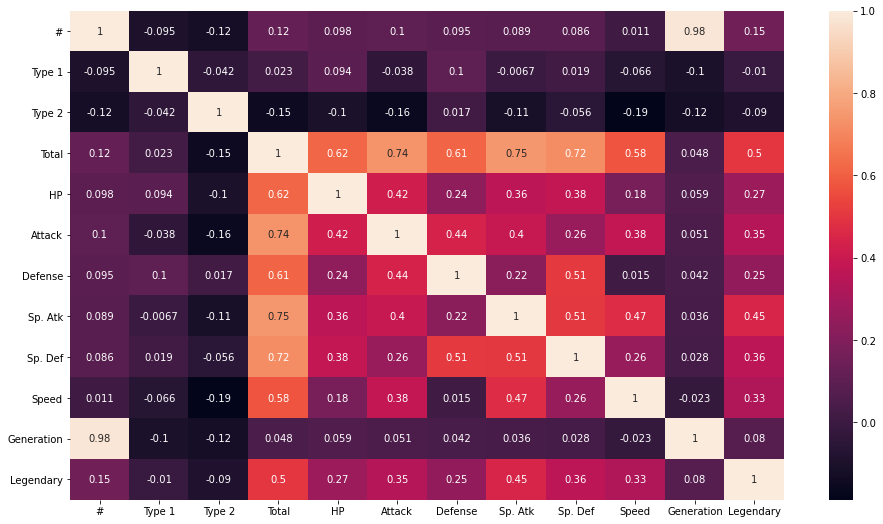

In [287]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot = True)

Let's predict without further preprocessing

In [288]:
result = dict()

In [289]:
from sklearn.model_selection import train_test_split
X = df.drop(['Name', 'Legendary'], axis = 1)
y = df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [290]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)
res = logR.score(X_test, y_test)*100
print(res)

result["logR(NP)"] = res

88.75


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Now let's do some preprocessing

In [291]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics




col_trans = make_column_transformer(
            (OneHotEncoder(),['Type 1', 'Type 2', 'Generation']), #
            (StandardScaler(),['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']),
            remainder = 'passthrough')

In [292]:
pipe = make_pipeline(col_trans,logreg)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

res = pipe.score(X_test, y_test)*100
print(res)
result["logR(P)"] = res

92.5


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [293]:
#SVM
from sklearn.svm import SVC

svm_model = SVC()
pipe = make_pipeline(col_trans, svm_model)
pipe.fit(X_train, y_train)
res = pipe.score(X_test, y_test)*100

print(res)
result["SVM"] = res
# y_pred = pipe.predict(X_test)
# print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

90.625


For this time, i'm using f1-score

In [294]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

gamma = 2.0
epsilon = K.epsilon()


I'll predict using neural network

In [295]:

model = Sequential()

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = Adam(1e-4),
             loss = "binary_crossentropy",
             metrics = ["accuracy", f1_m]
)

In [296]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stop = EarlyStopping(patience=20, verbose=1, monitor='val_accuracy', mode='max')


In [297]:
history = model.fit(
        X_train,
        y_train,
        epochs = 100,
        callbacks=[early_stop],
        validation_split=0.2,
        verbose = 0
    
)

Epoch 00027: early stopping


In [298]:
res = model.evaluate(X_train, y_train)[1]*100
result["NN"] = res

20/20 [==============================] - 0s 1ms/step - loss: 0.2542 - accuracy: 0.9094 - f1_m: 0.2498


In [299]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
pipe = make_pipeline(col_trans, rf)
pipe.fit(X_train, y_train)
res = pipe.score(X_test, y_test)*100

print(res)
result["RF"] = res


95.0


In [300]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.06, n_estimators = 100,validation_fraction = 0.2, n_iter_no_change=100)
pipe = make_pipeline(col_trans, gb)
pipe.fit(X_train, y_train)
res = pipe.score(X_test, y_test)*100

print(res)
result["GB"] = res

96.875


In [301]:
list(result.values())

[88.75, 92.5, 90.625, 90.9375011920929, 95.0, 96.875]

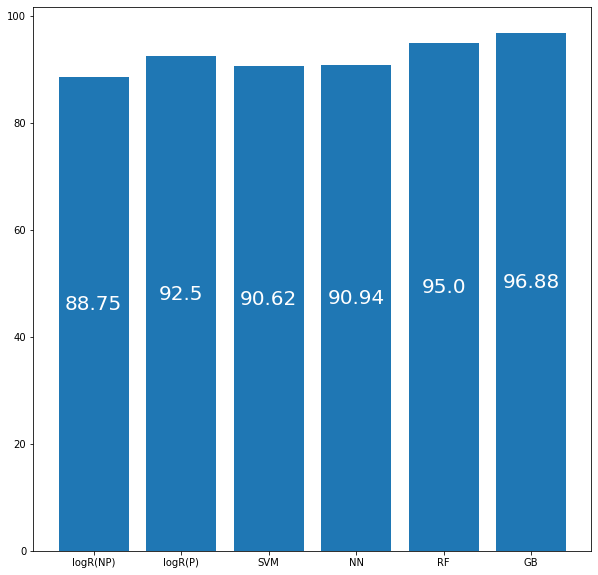

In [302]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = plt.bar(result.keys(), result.values())

def autolabel(rects):
    x = 0
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                round(list(result.values())[x], 2),
                ha='center', va='bottom', rotation=0, size=20, color="white")
        x+=1

autolabel(bar_plot)

# Conclusion

THAT'S IT!!, i will write the caption tomorrow, this is already midnight and I'm already sleepy